<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

**Analisi di un caso reale**:  Telco customer churn

Imposta e realizza un modello predittivo per calcolare il tasso d'abbandono di ciascun cliente usando i dati a disposizione *Telco_customer_churn.csv*,
seguendo i seguenti passi:

- Definire il tipo di problema di apprendimento 
- EDA
- Data preprocessing
- Data Modeling
- Optimization hyperparameter
- Model Evaluation
- Aggiungi delle conclusioni da portare a un ipotetico cliente (che non sa nulla di data science) per convincerlo che il tuo modello predittivo è valido. Inoltre porta qualche esempio di come ne può beneficiare il suo business

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Esercizio extra facoltativo:

Come puoi salvare il modello per riutilizzarlo?



### Introduzione

Il customer churn si riferisce alla perdita di clienti di un business, che può essere volontaria o attiva (e.g. il cliente non è soddisfatto e sceglie un concorrente) o involontaria o passiva (e.g. il pagamento dell'abbonamento non viene autorizzato dalla banca). La metrica usata per misurare il customer churn è il numero di clienti persi diviso il numero di clienti totali.

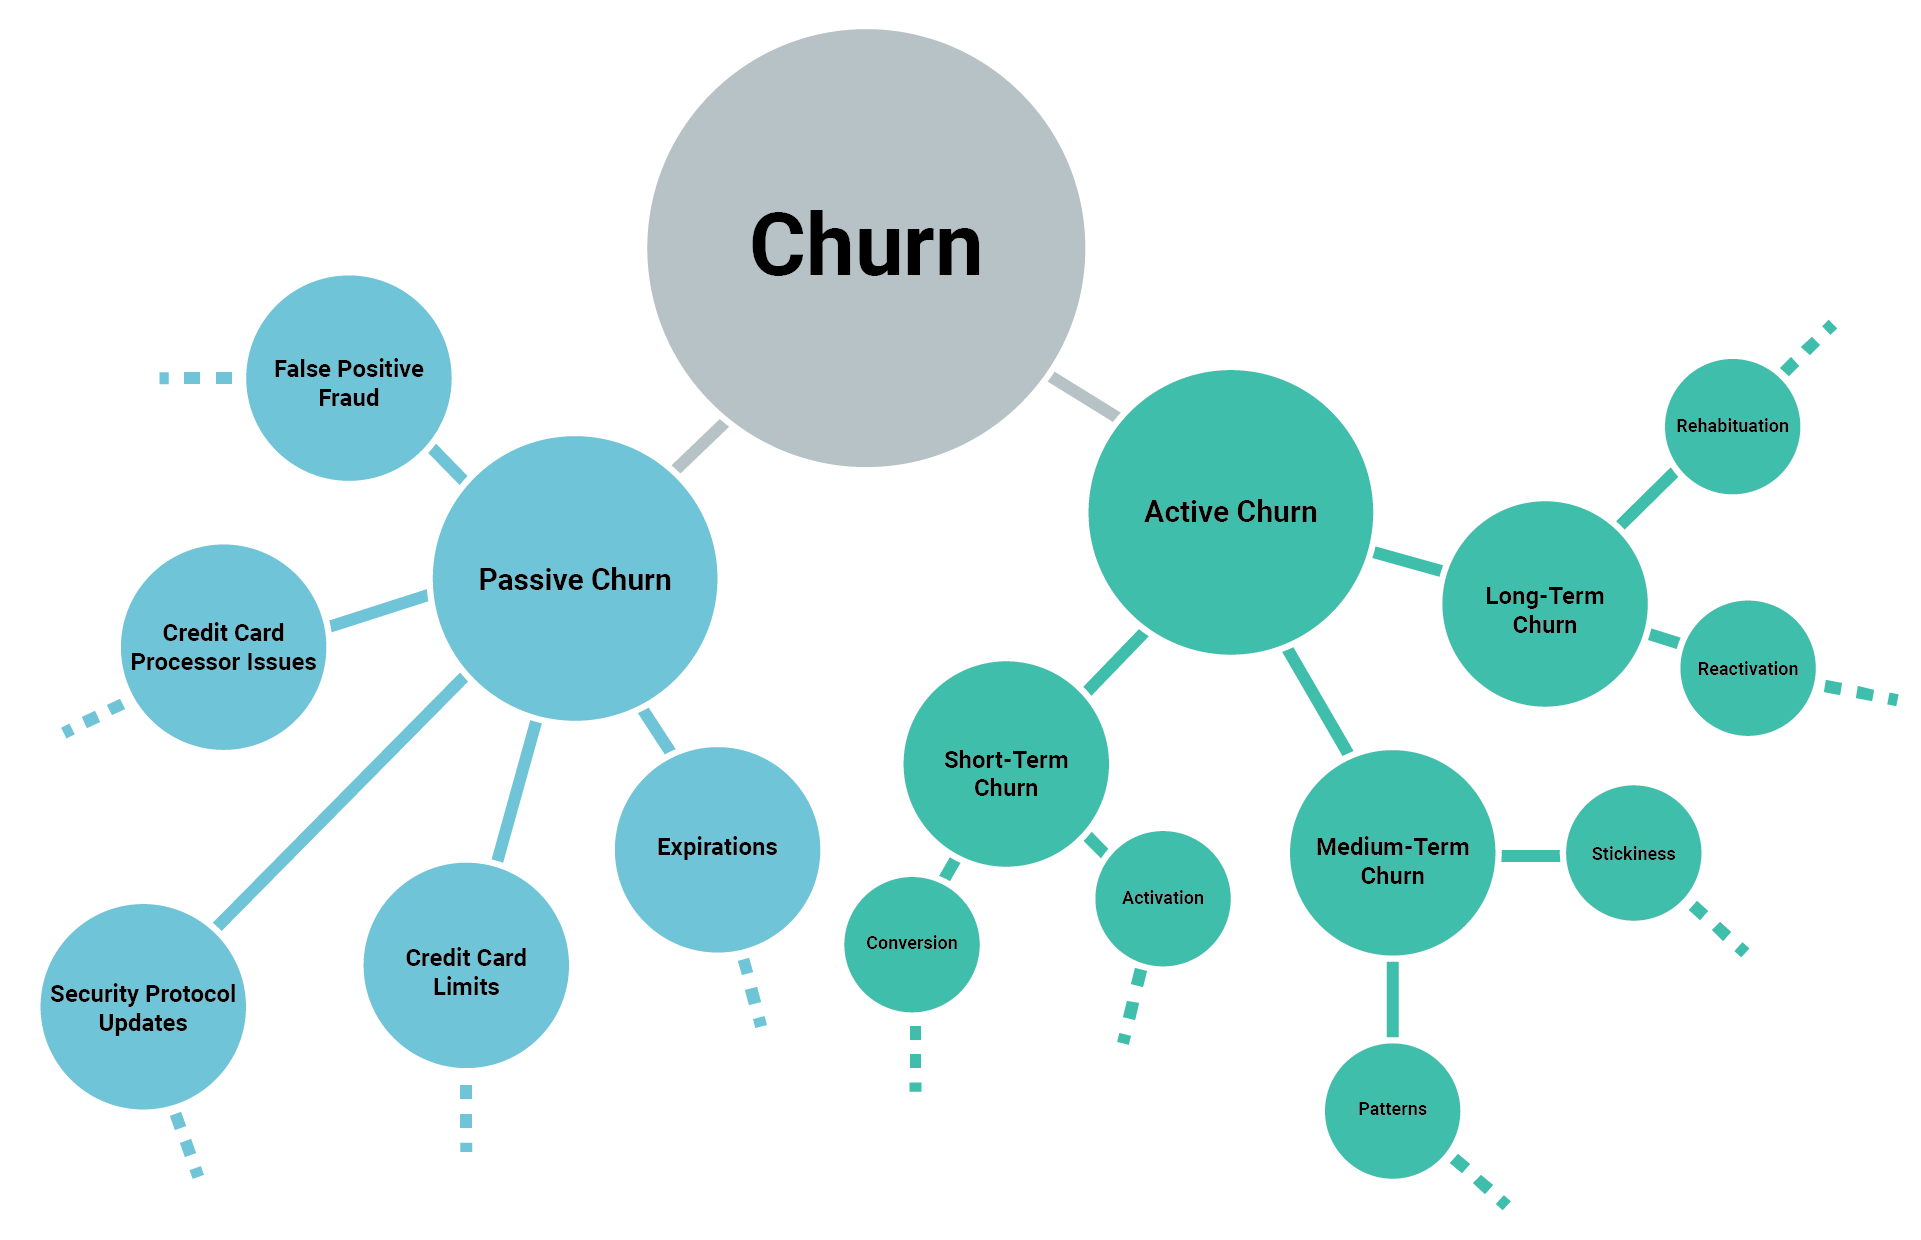

In [1]:
from IPython.display import Image
Image(filename='churn.png')

Il dataset Telco customer churn include informazioni relativamente a:

- perdita di clienti nell'ultimo mese
- anagrafica dei clienti
- servizi richiesti dai clienti
- informazioni contrattuali o relative all'account

_source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn_

### Load Modules

In [2]:
import numpy as np
import statistics as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from sklearn import metrics
from sklearn.metrics import f1_score
from statistics import mean
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [3]:
churn = pd.read_csv("Telco_customer_churn.csv")

In [4]:

pd.set_option('display.max_columns', None)
churn

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [6]:
churn.describe(include='all')

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
count,7043,7043.0,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,1869
unique,7043,NaN,1,1,1129,NaN,1652,NaN,NaN,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2,NaN,NaN,NaN,20
top,3668-QPYBK,NaN,United States,California,Los Angeles,NaN,"33.964131, -118.272783",NaN,NaN,Male,No,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No,NaN,NaN,NaN,Attitude of support person
freq,1,NaN,7043,7043,305,NaN,5,NaN,NaN,3555,5901,3641,5416,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174,NaN,NaN,NaN,192
mean,NaN,1.0,NaN,NaN,NaN,93521.964646,NaN,36.282441,-119.798880,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN,0.265370,58.699418,4400.295755,NaN
std,NaN,0.0,NaN,NaN,NaN,1865.794555,NaN,2.455723,2.157889,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN,0.441561,21.525131,1183.057152,NaN
min,NaN,1.0,NaN,NaN,NaN,90001.000000,NaN,32.555828,-124.301372,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN,0.000000,5.000000,2003.000000,NaN
25%,NaN,1.0,NaN,NaN,NaN,92102.000000,NaN,34.030915,-121.815412,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN,0.000000,40.000000,3469.000000,NaN
50%,NaN,1.0,NaN,NaN,NaN,93552.000000,NaN,36.391777,-119.730885,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN,0.000000,61.000000,4527.000000,NaN
75%,NaN,1.0,NaN,NaN,NaN,95351.000000,NaN,38.224869,-118.043237,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN,1.000000,75.000000,5380.500000,NaN


### Exploratory Data Analysis

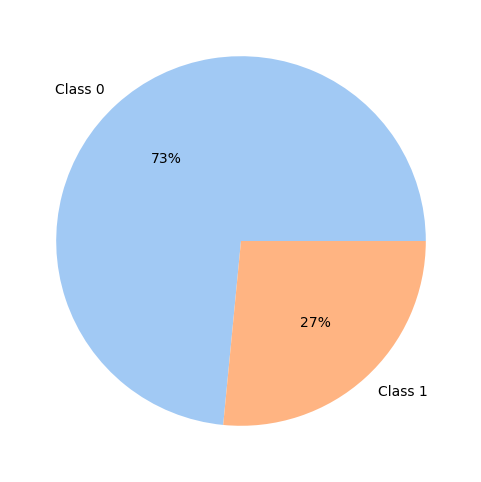

In [7]:
#Target population balance

plt.figure(figsize = (15,6))

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#define labels
labels = ['Class 0','Class 1']

#create pie chart
plt.pie(churn['Churn Label'].value_counts(), labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

La distribuzione fra classi è sbilanciata, con il 27% di clienti churn ed il 73% di clienti non churn. Lo sbilanciamento fra classi va tenuto in considerazione nella scelta della metrica da utilizzare per valutare e confrontare i risultati ottenuti dai diversi modelli che si andranno a implementare. Ad esempio nel caso di distribuzioni sbilanciate fra classi, è preferibile utilizzare f1 come metrica al posto dell'accuratezza che è più adatta nel caso di classi bilanciate. Lo sbilanciamento fra classi target va anche tenuto in conto nella suddivisione fra train e test set e/o validation set, utilizzando l'opzione stratify che permette di mantenere costante la distribuzione fra classi nei diversi sottoinsiemi di dati.

In [8]:
churned_customers = churn[churn['Churn Label'] == 'Yes']

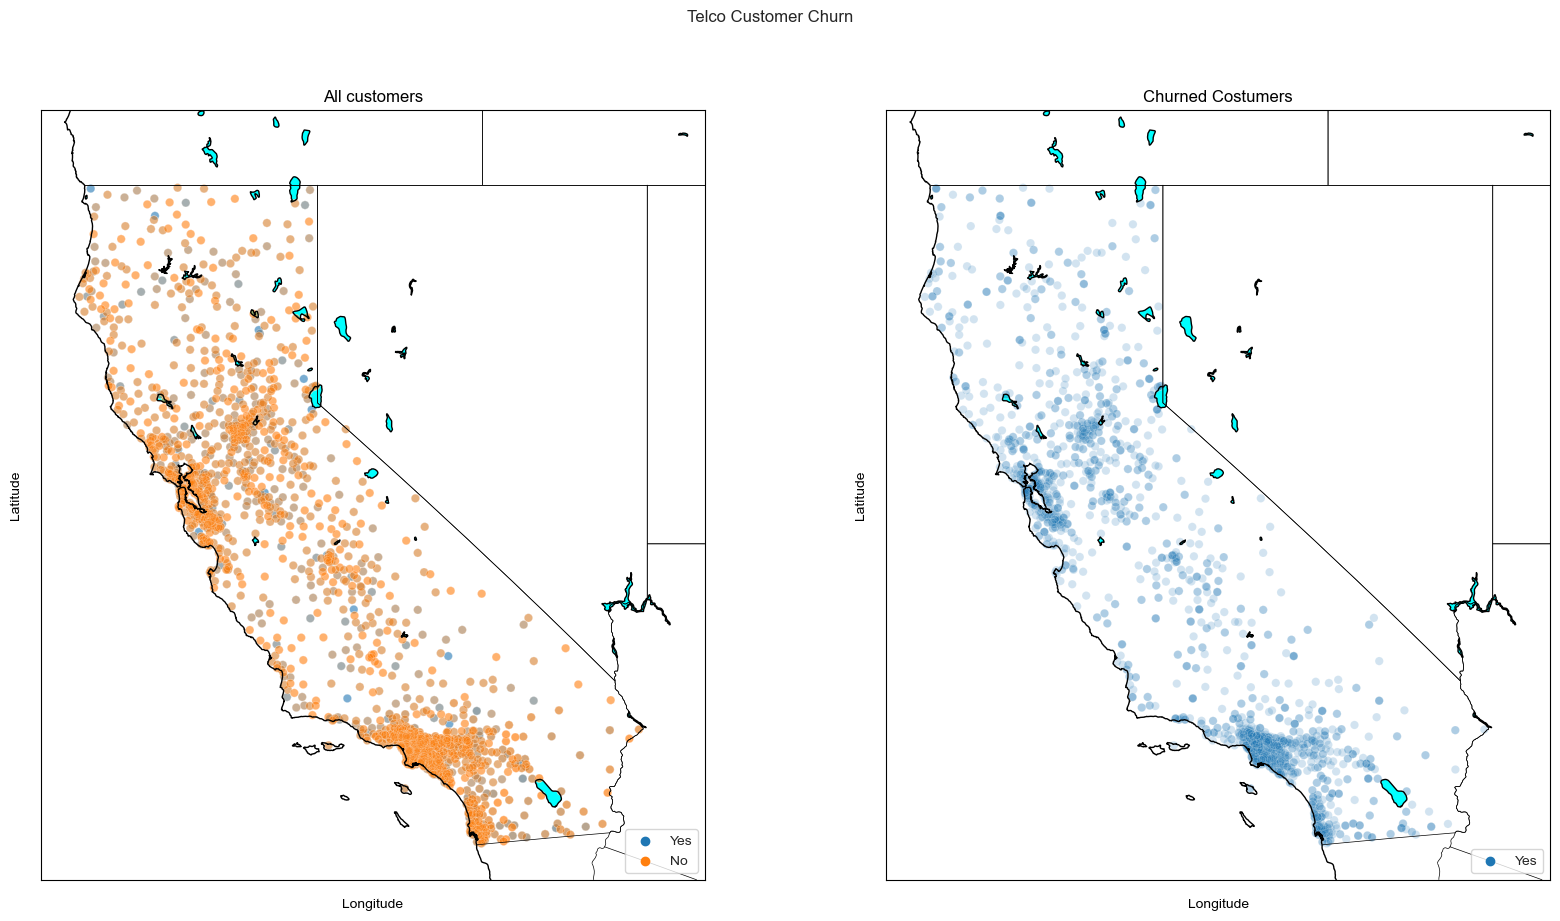

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

#Geolocalizzazione clienti

# plot 1
axs[0].set_aspect('equal')
axs[0].set_xlabel('Longitude', labelpad=10)
axs[0].set_ylabel('Latitude', labelpad=10)
axs[0].set_title('All customers')

# creazione della mappa
m = Basemap(ax=axs[0], projection='merc', llcrnrlat=32, urcrnrlat=43, llcrnrlon=-125, urcrnrlon=-113, resolution='h')

# disegno della mappa
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# aggiunta del colore di sfondo
m.fillcontinents(color='white',lake_color='aqua')

sns.set_style(style='whitegrid')

# disegno dei punti
a, b = m(churn['Longitude'].values, churn['Latitude'].values)
sns.scatterplot(x=a, y=b, hue=churn['Churn Label'], alpha=0.2, ax=axs[0])

# aggiungi la legenda
axs[0].legend(loc='lower right')

#Geolocalizzazione clienti churn

# plot 2
axs[1].set_aspect('equal')
axs[1].set_xlabel('Longitude', labelpad=10)
axs[1].set_ylabel('Latitude', labelpad=10)
axs[1].set_title('Churned Costumers')

# creazione della mappa
m = Basemap(ax=axs[1], projection='merc', llcrnrlat=32, urcrnrlat=43, llcrnrlon=-125, urcrnrlon=-113, resolution='h')

# disegno della mappa
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# aggiunta del colore di sfondo
m.fillcontinents(color='white',lake_color='aqua')

sns.set_style(style='whitegrid')

# disegno dei punti
a, b = m(churned_customers['Longitude'].values, churned_customers['Latitude'].values)
sns.scatterplot(x=a, y=b, hue=churned_customers['Churn Label'], alpha=0.2, ax=axs[1])

# aggiungi la legenda
axs[1].legend(loc='lower right')

plt.suptitle('Telco Customer Churn')
plt.show()

Tutti i clienti del dataset, sia quelli attivi che quelli che hanno disdetto, risiedono in California, prevalentamente nei maggiori centri abitati come Los Angeles, San Francisco, Sacramento, San Siego.

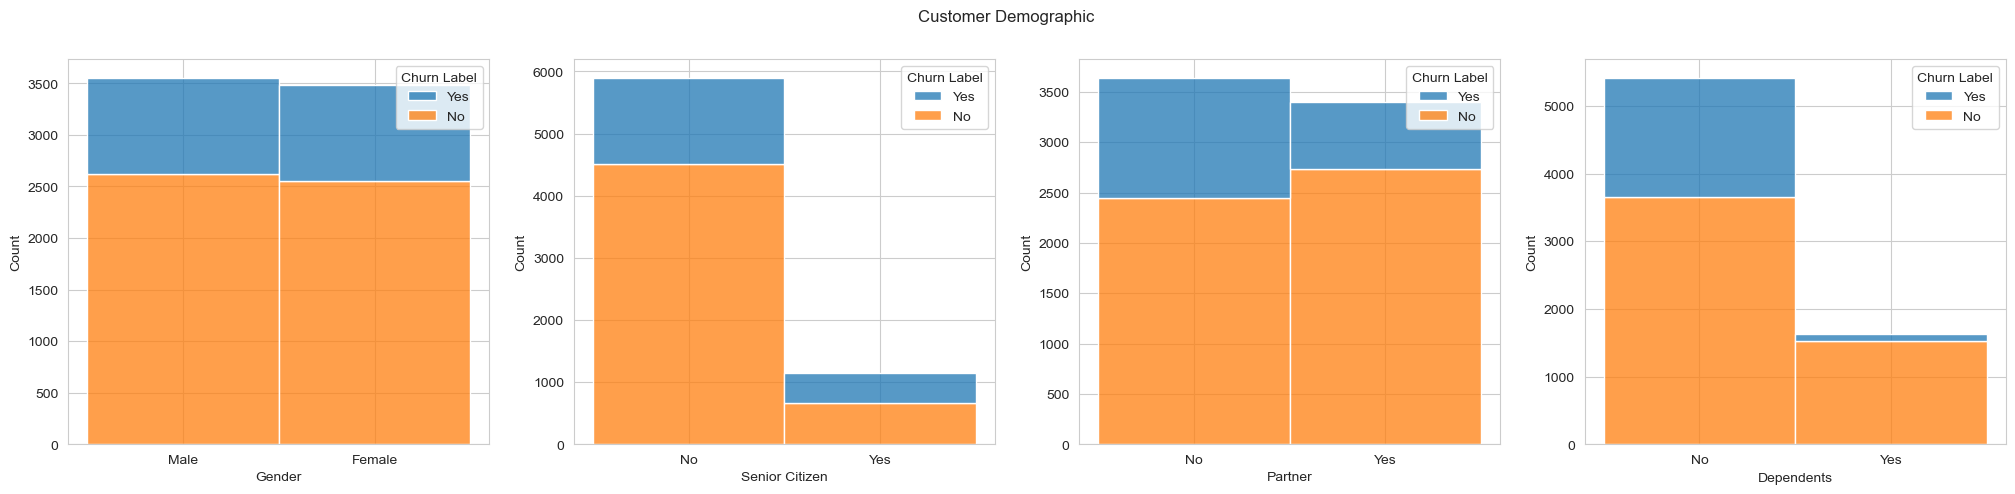

In [10]:
#Anagrafica clienti

fig, axs = plt.subplots(1, 4, figsize=(25, 5)) # 1 rows, 4 columns of subplots

sns.histplot(data=churn, x='Gender', hue='Churn Label', multiple='stack', ax=axs[0])
sns.histplot(data=churn, x='Senior Citizen', hue='Churn Label', multiple='stack', ax=axs[1])
sns.histplot(data=churn, x='Partner', hue='Churn Label', multiple='stack', ax=axs[2])
sns.histplot(data=churn, x='Dependents', hue='Churn Label', multiple='stack', ax=axs[3])

plt.suptitle('Customer Demographic')
plt.show()


Dai grafici a barre precedenti è interessante notare che mentre non c'è una correlazione evidente fra churn label e genere, esiste invece una correlazione fra churn label e Senior Citizen, Partner e Dependents. In particolare, i clienti che hanno disdetto sono prevalentemente single e senza figli. 

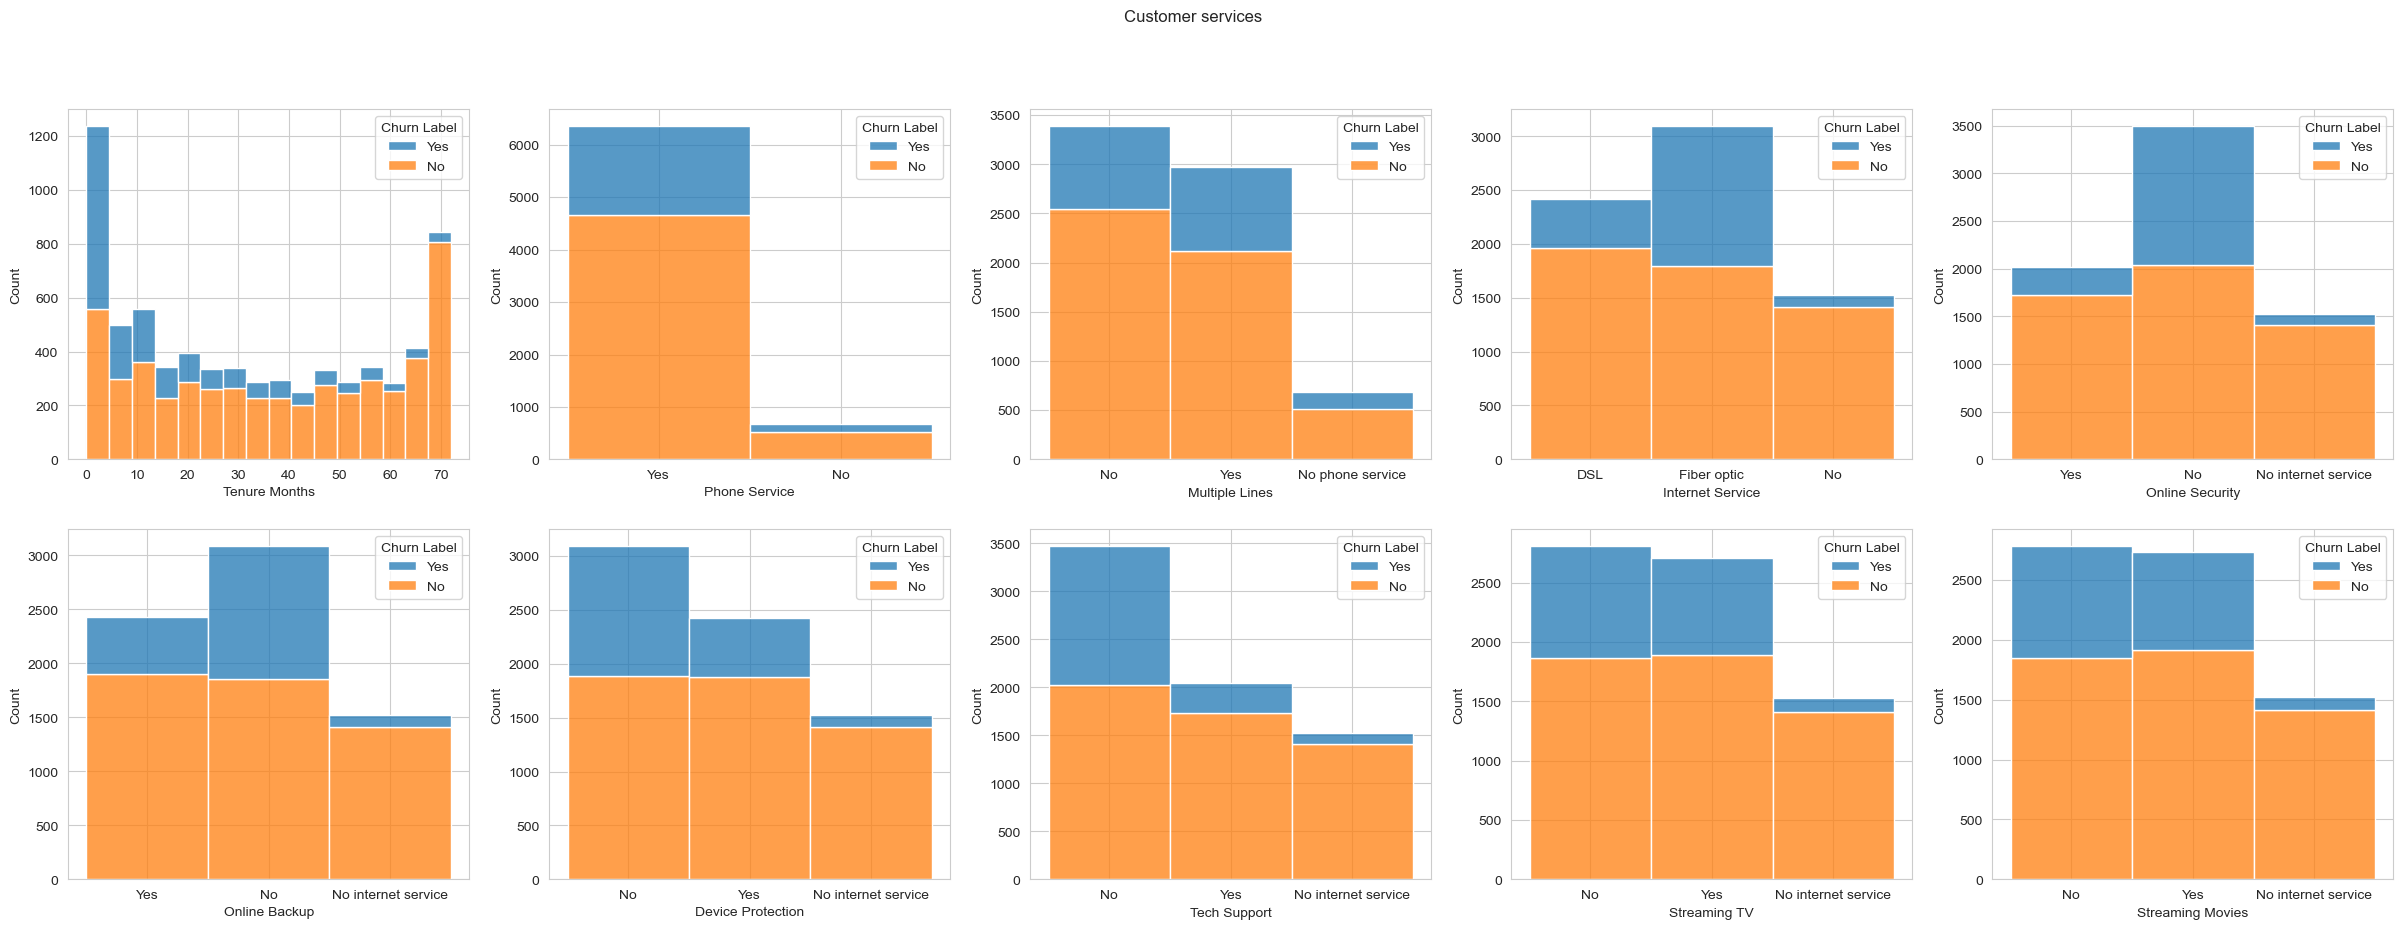

In [11]:
#Servizi clienti

fig, axs = plt.subplots(2, 5, figsize=(30, 10)) # 2 rows, 5 columns of subplots

sns.histplot(data=churn, x='Tenure Months', hue='Churn Label', multiple='stack', ax=axs[0, 0])
sns.histplot(data=churn, x='Phone Service', hue='Churn Label', multiple='stack', ax=axs[0, 1])
sns.histplot(data=churn, x='Multiple Lines', hue='Churn Label', multiple='stack', ax=axs[0, 2])
sns.histplot(data=churn, x='Internet Service', hue='Churn Label', multiple='stack', ax=axs[0, 3])
sns.histplot(data=churn, x='Online Security', hue='Churn Label', multiple='stack', ax=axs[0, 4])
sns.histplot(data=churn, x='Online Backup', hue='Churn Label', multiple='stack', ax=axs[1, 0])
sns.histplot(data=churn, x='Device Protection', hue='Churn Label', multiple='stack', ax=axs[1, 1])
sns.histplot(data=churn, x='Tech Support', hue='Churn Label', multiple='stack', ax=axs[1, 2])
sns.histplot(data=churn, x='Streaming TV', hue='Churn Label', multiple='stack', ax=axs[1, 3])
sns.histplot(data=churn, x='Streaming Movies', hue='Churn Label', multiple='stack', ax=axs[1, 4])

plt.suptitle('Customer services')
plt.show()

Come evidente dal primo istogramma, i clienti che disdicono tendono a farlo nei primi mesi dalla sottoscrizione contrattuale. I servizi richiesti da questi clienti sono in particolare il telefono e la fibra ottica mentre non richiedono in genere servizi di sicurezza online, backup online, protezione del dispositivo e supporto tecnico.

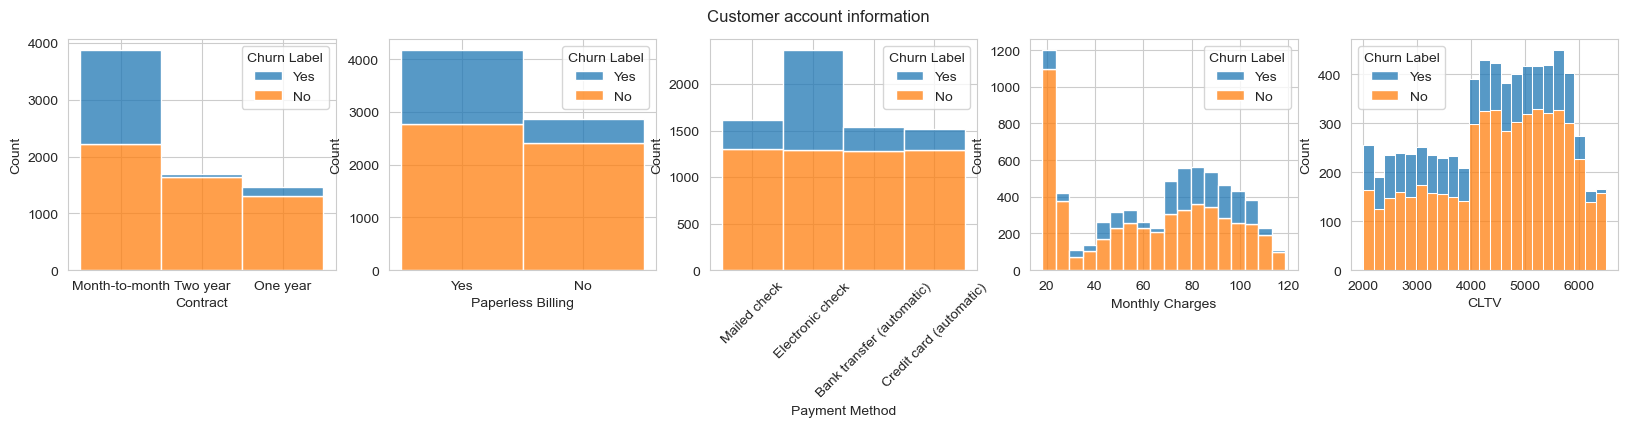

In [12]:
#Informazioni contrattuali

fig, axs = plt.subplots(1, 5, figsize=(20, 3)) # 1 rows, 5 columns of subplots

sns.histplot(data=churn, x='Contract', hue='Churn Label', multiple='stack', ax=axs[0])
sns.histplot(data=churn, x='Paperless Billing', hue='Churn Label', multiple='stack', ax=axs[1])
sns.histplot(data=churn, x='Payment Method', hue='Churn Label', multiple='stack', ax=axs[2])
sns.histplot(data=churn, x='Monthly Charges', hue='Churn Label', multiple='stack', ax=axs[3])
sns.histplot(data=churn, x='CLTV', hue='Churn Label', multiple='stack', ax=axs[4])

# Rotate x-axis labels on the third histogram
if isinstance(axs[2], plt.Axes):
    axs[2].tick_params(axis='x', labelrotation=45)
else:
    print("axs[2] is not an AxesSubplot object")

plt.suptitle('Customer account information')
plt.show()



Il cliente che recede ha nella maggioranza dei casi un contratto con rinnovo a cadenza mensile. Il metodo di pagamento preferito da questo genere di clienti è l'assegno elettronico e la fattura elettronica come ricevuta. E' infine interessante notare come il clienti churn tendono ad avere spese mensili più alte della media.

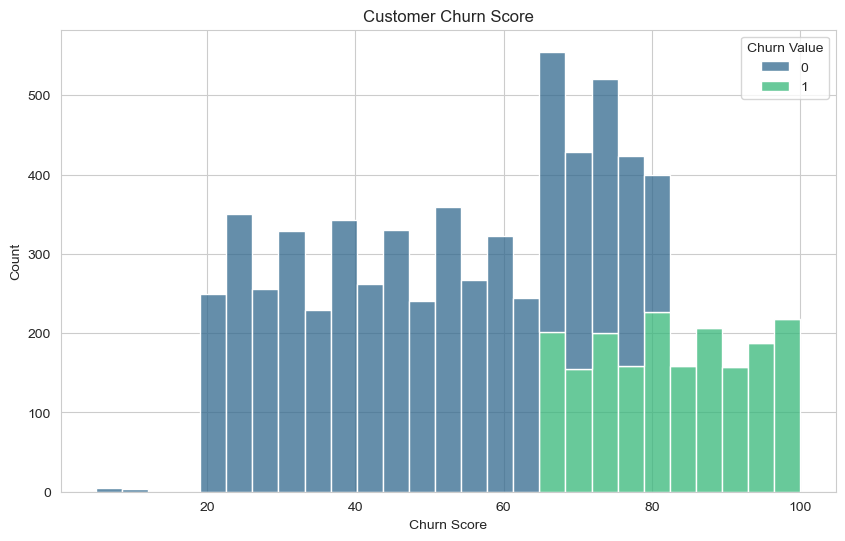

In [13]:
#Customer churn score

plt.figure(figsize=(10,6))

sns.histplot(data=churn, x='Churn Score', hue='Churn Value', multiple='stack', palette='viridis')
plt.title('Customer Churn Score')

plt.show()

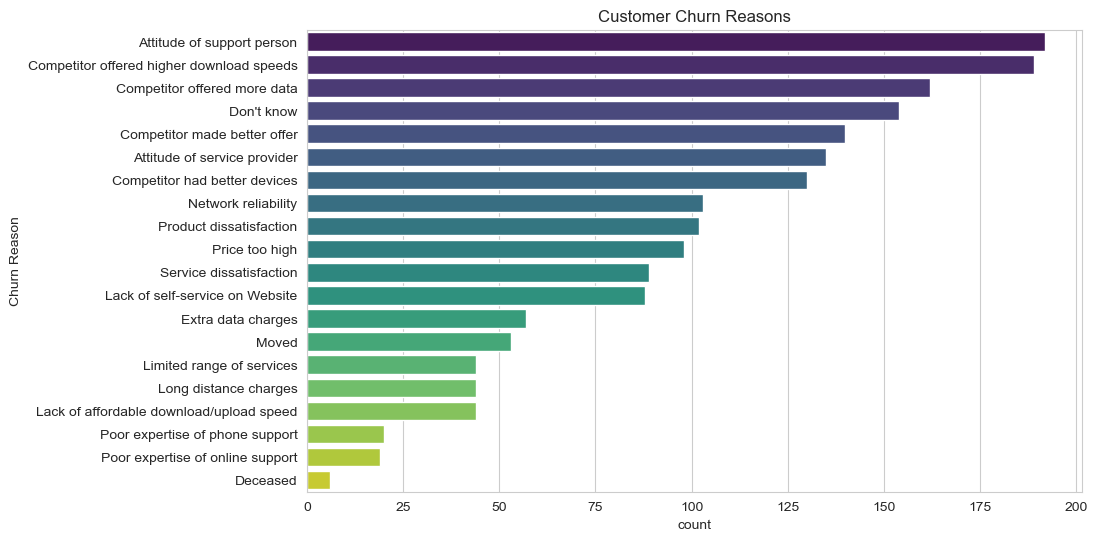

In [14]:
#Customer churn reasons

plt.figure(figsize=(10,6))

# Get the count of each Churn Reason
reason_counts = churn['Churn Reason'].value_counts()

# Create a list of Churn Reasons sorted by descending count
reason_order = reason_counts.index.tolist()
sns.countplot(data=churn, y='Churn Reason', order=reason_order, palette='viridis')
plt.title('Customer Churn Reasons')

plt.show()

Le ragioni per cui i clienti disdicono sono molteplici ma quelle più comuni sono un'insoddisfazione dovuta all'atteggiamento del servizio clienti, oppure un'offerta più allettante di un concorrente che offre maggiore velocità in download o più data.

### Data Preprocessing

In [15]:
churn = churn.drop(['CustomerID', 'Count', 'Country', 'State','City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude',
                    'Churn Label','Churn Score', 'Churn Reason'], axis=1) #rimuove colonne Churn Score e Churn Reason dalle feature
churn['Total Charges'] = pd.to_numeric(churn['Total Charges'], errors = 'coerce') #modifica la feature 'Total Charges' da string a float

In [16]:
churn = churn.dropna().reset_index(drop=True) #Elimina righe con Nan e reset indici

In [17]:
y = churn.pop('Churn Value') #memorizza colonna target in y e rimuove da churn
X = churn

In [18]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7032 non-null   object 
 1   Senior Citizen     7032 non-null   object 
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   Tenure Months      7032 non-null   int64  
 5   Phone Service      7032 non-null   object 
 6   Multiple Lines     7032 non-null   object 
 7   Internet Service   7032 non-null   object 
 8   Online Security    7032 non-null   object 
 9   Online Backup      7032 non-null   object 
 10  Device Protection  7032 non-null   object 
 11  Tech Support       7032 non-null   object 
 12  Streaming TV       7032 non-null   object 
 13  Streaming Movies   7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  Paperless Billing  7032 non-null   object 
 16  Payment Method     7032 

In [19]:
#Suddivisione fra feature categoriche e numeriche

categorical = ['Gender','Senior Citizen', 'Partner', 'Dependents','Phone Service', 'Multiple Lines',
               'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
               'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
numerical = ['Tenure Months', 'Monthly Charges','Total Charges', 'CLTV']

In [20]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #Suddivisione train test

In [21]:
#Column Transformer

ct = ColumnTransformer([('num', StandardScaler(), numerical), ('cat', OneHotEncoder(), categorical)])
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)
X = ct.transform(X)

### Optimization Hyperparameter
Baseline Model - Dummy Classifier

In [22]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf_scores = cross_val_score(dummy_clf,X,y,scoring='f1',cv=5)
dummy_clf_score_mean = dummy_clf_scores.mean()
dummy_clf_score_std = dummy_clf_scores.std()
print('Mean score:', dummy_clf_score_mean, '\nStandard Deviation:',dummy_clf_score_std)

Mean score: 0.0 
Standard Deviation: 0.0


KNN Classifier

In [23]:
# Create KNN classifier (n_neighbors = 5)
knn_base = KNeighborsClassifier(n_neighbors = 5)
knn_base_scores = cross_val_score(knn_base,X,y,scoring='f1',cv=5)
knn_base_score_mean = knn_base_scores.mean()
knn_base_score_std = knn_base_scores.std()
print('Mean score:', knn_base_score_mean, '\nStandard Deviation:',knn_base_score_std)

Mean score: 0.5614484598029212 
Standard Deviation: 0.014358274986732762


KNN Classifier with Hyperparameter Optimization

In [24]:
#Grid Search

params = {'n_neighbors': np.arange(2,50)}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, scoring='f1', cv=5, n_jobs=-1) 
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1')

In [25]:
grid.best_score_

0.621386350960196

In [26]:
knn_opti = grid.best_estimator_

In [27]:
grid.best_params_

{'n_neighbors': 41}

In [28]:
knn_opti_scores = cross_val_score(knn_opti,X,y,scoring='f1',cv=5)
knn_opti_score_mean = knn_opti_scores.mean()
knn_opti_score_std = knn_opti_scores.std()
print('Mean score:', knn_opti_score_mean, '\nStandard Deviation:',knn_opti_score_std)

Mean score: 0.6211233005411438 
Standard Deviation: 0.01646551662608851


Logistic Regression

In [29]:
# Create Logistic Regression classifier
lr_base = LogisticRegression()
lr_base_scores = cross_val_score(lr_base,X,y,scoring='f1',cv=5)
lr_base_score_mean = lr_base_scores.mean()
lr_base_score_std = lr_base_scores.std()
print('Mean score:', lr_base_score_mean, '\nStandard Deviation:',lr_base_score_std)

Mean score: 0.619280191597449 
Standard Deviation: 0.026159446154340172


Decision Tree

In [30]:
# Create Logistic Regression classifier
dt_base = DecisionTreeClassifier()
dt_base_scores = cross_val_score(dt_base,X,y,scoring='f1',cv=5)
dt_base_score_mean = dt_base_scores.mean()
dt_base_score_std = dt_base_scores.std()
print('Mean score:', dt_base_score_mean, '\nStandard Deviation:',dt_base_score_std)

Mean score: 0.49286821475159365 
Standard Deviation: 0.02358814358279279


Decision Tree with Hyperparameter Optimization

In [31]:
#Grid Search

params = {'max_depth': np.arange(2,30), 'min_samples_leaf': np.arange(4,10)}
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, params, scoring='f1', cv=5, n_jobs=-1) 
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_samples_leaf': array([4, 5, 6, 7, 8, 9])},
             scoring='f1')

In [32]:
grid.best_score_

0.6029224660995501

In [33]:
dt_opti = grid.best_estimator_

In [34]:
grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 9}

In [35]:
dt_opti_scores = cross_val_score(dt_opti,X,y,scoring='f1',cv=5)
dt_opti_score_mean = dt_opti_scores.mean()
dt_opti_score_std = dt_opti_scores.std()
print('Mean score:', dt_opti_score_mean, '\nStandard Deviation:',dt_opti_score_std)

Mean score: 0.5964435644840544 
Standard Deviation: 0.02224040842191893


Voting Classifier

In [36]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('KNN optimized', knn_opti), ('Logistic Regression', lr_base), 
                                  ('Decision Tree Optimized', dt_opti)], voting='hard')

vc_scores = cross_val_score(vc,X,y,scoring='f1',cv=5)
vc_score_mean = vc_scores.mean()
vc_score_std = vc_scores.std()
print('Mean score:', vc_score_mean, '\nStandard Deviation:',vc_score_std)

Mean score: 0.6232840361106367 
Standard Deviation: 0.024965515649929187


### Model Evaluation

In [37]:
#Voting Classifier 

vc.fit(X_train, y_train)
y_pred_vc = vc.predict(X_test)
print(classification_report(y_test, y_pred_vc))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1033
           1       0.63      0.62      0.63       374

    accuracy                           0.80      1407
   macro avg       0.75      0.74      0.75      1407
weighted avg       0.80      0.80      0.80      1407



In [38]:
#Customer Churn Rate

ccr = len(y_pred_vc[y_pred_vc == 1])/len(y_pred_vc)*100
print('Predicted Customer Churn Rate on Test DataSet is:', "%.2f" % ccr, '%')

Predicted Customer Churn Rate on Test DataSet is: 25.94 %


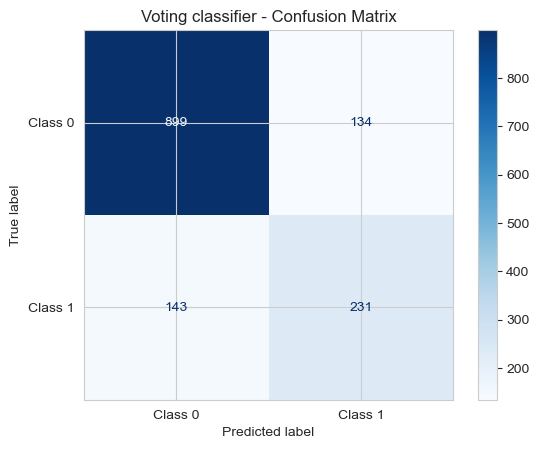

In [39]:
#Create and plot confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_vc)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Class 0', 'Class 1'])
cm_display.plot(cmap='Blues', values_format='d')
plt.title('Voting classifier - Confusion Matrix')

plt.show()

### Conclusioni

Al fine di predirre la customer churn di un'azienda Telco, sono stati implementati i seguenti modelli predittivi:

- __Baseline Model - Dummy Classifier__
- __KNN Classifier__
- __KNN Classifer with hyperparameter optimization__
- __Logistic Regression__
- __Decision Tree__
- __Decision Tree with hyperparameter optimization__
- __Voting Classifier__

Il modello che ha dato risultati migliori è stato il Voting Classifier che aggrega i risultati dei primi tre modelli più efficienti considerati nell'analisi, cioè Logistic Regression, Decision Tree e KNN con iperparametri ottimizzati con Grid Search. 

Il modello ha un f1 score di 0.63 considerando la classe 1 (clienti churn) come classe positiva. In particolare precision e recall per la classe 1 sono rispettivamente 0.64 e 0.62.

Una volta identificati i nuovi clienti a maggior rischio di abbandono utilizzando la logistic regression e predetto il customer churn rate del mese successivo a quello corrente, l'azienda può mettere in campo una serie di azioni di fidelizzazione mirate al fine di mitigare la perdita potenziale dei clienti e quindi la perdita di fatturato e di utile.

Contemporaneamente viene suggerito all'azienda di valutare delle azioni di mitigazione preventive relativamente alla prima causa di abbandono clienti, cioè il comportamento del servizio clienti non sempre apprezzato. 



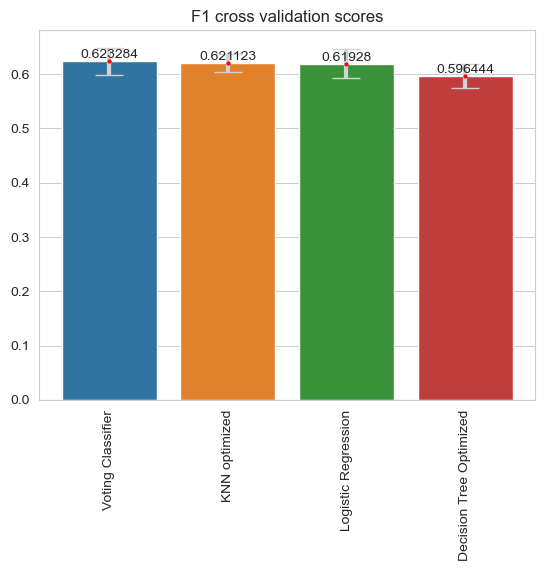

In [40]:
x = ['Voting Classifier','KNN optimized','Logistic Regression', 'Decision Tree Optimized']
y= [vc_score_mean, knn_opti_score_mean, lr_base_score_mean, dt_opti_score_mean]

# Define Error

y_error = [vc_score_std, knn_opti_score_std, lr_base_score_std, dt_opti_score_std]

# Plot Bar chart

ax = sns.barplot(x,y)

# Plot error bar

(_, caps, _) = plt.errorbar(x,y, yerr=y_error, fmt='.', color='r',
             ecolor='lightgray', elinewidth=3, markersize=4, capsize=10)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.tick_params(axis='x', labelrotation=90)
plt.title('F1 cross validation scores')

ax.bar_label(ax.containers[0])

# Display graph

plt.show()

In [41]:
y

[0.6232840361106367, 0.6211233005411438, 0.619280191597449, 0.5964435644840544]

### Extra: save and load model

In [42]:
#Pipeline definition

pipe = Pipeline((('preprocessing',ct),('classifier',vc)))

In [43]:
#Save Pipeline

import joblib
joblib.dump(pipe, 'model.joblib')

['model.joblib']

In [44]:
#Load Pipeline

pipe = joblib.load('model.joblib')

In [45]:
pipe

Pipeline(steps=(('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Tenure Months',
                                                   'Monthly Charges',
                                                   'Total Charges', 'CLTV']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Senior Citizen',
                                                   'Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('classifier',
                 VotingClassifier(estimators=[('KNN optimized',
                                               KNeighborsClassifier(n_neighbors=41)),
                                              ('Logistic Regression',
                                               LogisticRegression()),
                                              ('Decision Tree Optimized',
                                               DecisionTreeClassifier(max_depth=6,
                                                                      min_samples_leaf=9))]))))